#### <strong>第三次作品：分類器的原理與評比實驗</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標</font>：
- 使用標準化資料以及主成分資料進行模型訓練，並分為訓練集與測試集。

- 使用三種分類器進行訓練與測試。

- 比較不同資料對於不同分類器之訓練結果的準確率。

<hr>

#### <strong><font color=cornflowerblue>第一部分 : </font></strong> 
#### <strong><font color=lightsteelblue>準備資料(讀入資料)</font></strong> 

以下程式碼為將來自AT&T 40 個人的人臉影像讀入，共 400 張，每張大小 64×64。

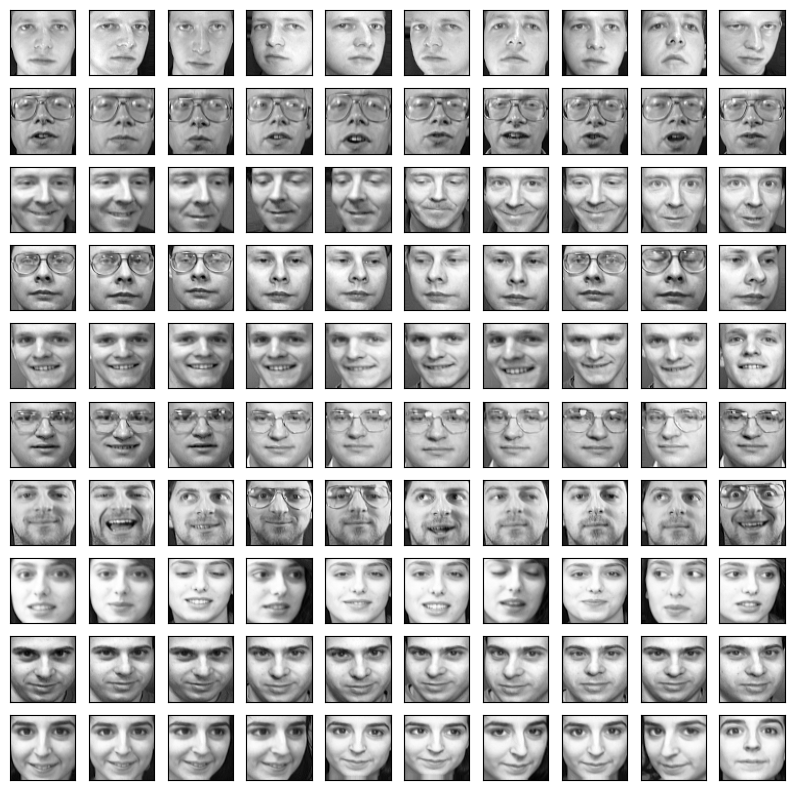

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

np.random.seed(30)
def show_montage(X, n, m, h, w):
    '''
    X: 影像資料矩陣，每行代表一張影像
    n,m: 每張影像的大小 nxm
    h,w: 建立一個蒙太奇圖陣，大小 figsize=(w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: 
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

df = pd.read_csv('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/face_data.csv')
n_presons = df['target'].nunique()
X = np.array(df.drop('target', axis=1))
y = np.array(df['target'])
n, m = 64, 64
show_montage(X.T, n , m , 10, 10) ##總共40個人，每人10張照片，每張照片64*64

#### <strong><font color=lightsteelblue>準備資料(分離資料、標準化資料)</font></strong> 
將讀入的人臉資料中的X、y分別以 7:3 的比例切割成訓練與測試集，最後得到共4組資料集。

並設置 random_state 且對 X 的訓練與測試集分別標準化以便在後續的分類器中使用。

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤  #將pandas資料轉成array
y = np.array(df.iloc[:, -1]) #標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.30, random_state=30) #把x y分成訓練和測試資料(兩組) 70%訓練 30%測試，總共4組資料
# Standardize data
#要不要標準化資料，標準化後資料平均值為0，標準差為1
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) 
X_test_ = scaler.fit_transform(X_test)

#### <strong><font color=cornflowerblue>第二部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用標準化後之原始資料</font></strong> 


以下程式碼目的是對訓練集資料使用 Logistic Regression 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以折線圖方便觀察。

三種演算法中表現最好的是使用 'liblinear' 與 'newton-cg' 的結果，準確率達到 96.67% 。

Solver: lbfgs
Accuracy: 96.67%

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Solver: liblinear
Accuracy: 92.50%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       0.50      1.00      0.67         2
          11       1.00      1.00      1.00         5
          12       1.00      0.40      0.57         5
          13       0.33      1.00      0.50         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

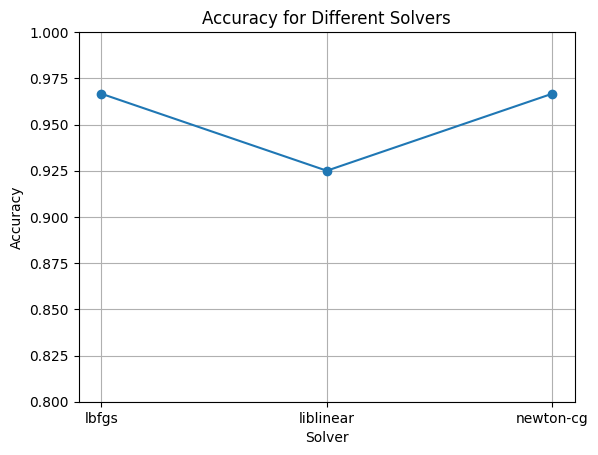

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR = LogisticRegression(solver=solver, **opts) 
    clf_LR.fit(X_train_, y_train)
    y_pred = clf_LR.predict(X_test_)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Support Vector Machine 訓練模型並測試準確率，其中使用三種不同的 kernal (核函數)與直接使用線性 SVM 。
並依照準確率結果畫出折線圖，方便觀察。

透過折線圖可以清楚的觀察到，直接使用 linearSVM 的結果表現最好，準確率為 95%。

Kernel: linear
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       0.71      1.00      0.83         5
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         3
          17

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Kernel: poly
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.60      0.75      0.67         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       0.83      1.00      0.91         5
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         3
          17  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Kernel: linearSVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
         

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

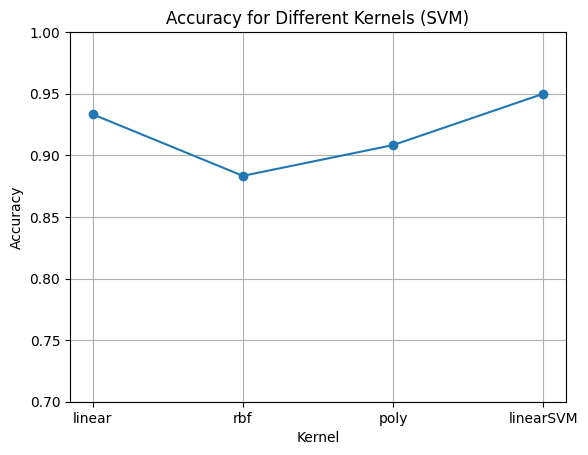

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly', 'linearSVM']
C = 1 # SVM regularization parameter
opts = dict(C=C, tol=1e-6, max_iter=int(1e6))
accuracies = []  # 用來收集準確率

for kernel in kernels:
    if kernel == 'linearSVM':
        clf_svm = LinearSVC(**opts)
    else:
        clf_svm = SVC(kernel=kernel, **opts)
    
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

# 繪製折線圖
plt.plot(kernels, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Kernels (SVM)')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.grid(True)
plt.show()


#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並畫出準確率之折線圖方便觀察。

其中表現最好的為使用演算法 sgd' 與 'lbfgs'的結果，準確率皆高達 95%。

- 下圖之 y 軸參數有誤，但因為執行時間關係，因此重新設定後的圖在下一張。

Solver: sgd
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         4
           2       1.00      0.33      0.50         3
           3       0.29      0.67      0.40         3
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         4
           7       0.25      0.25      0.25         4
           8       1.00      1.00      1.00         1
           9       0.67      0.80      0.73         5
          10       1.00      1.00      1.00         2
          11       1.00      0.60      0.75         5
          12       1.00      0.20      0.33         5
          13       1.00      1.00      1.00         1
          14       0.44      0.80      0.57         5
          15       0.00      0.00      0.00         3
          16       0.20      0.33      0.25         3
          17 

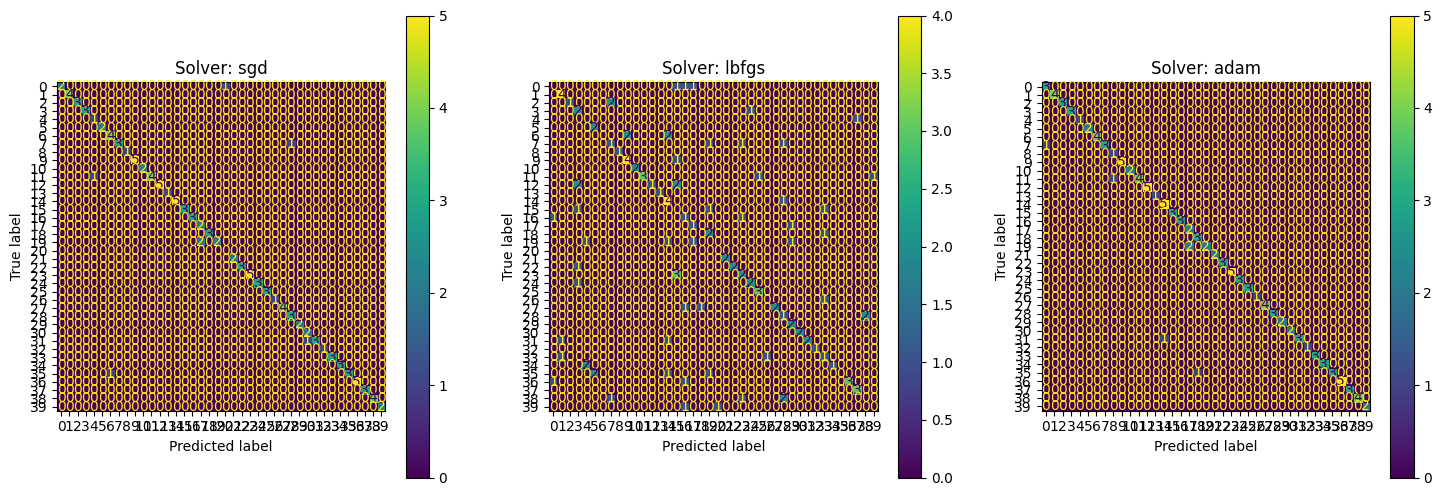

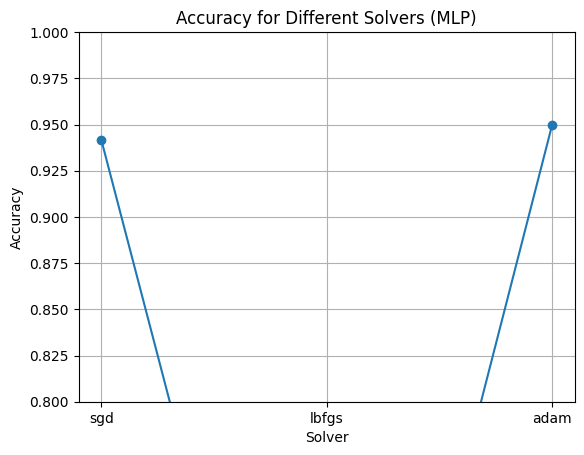

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

solvers = ['sgd', 'lbfgs', 'adam']
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes=hidden_layers, verbose=False, activation=activation, tol=1e-6, max_iter=int(1e6))

accuracies = []  # 用來收集準確率
confusion_matrices = []  # 用來收集混淆矩陣

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 創建 1x3 的子圖

for i, solver in enumerate(solvers):
    clf_MLP = MLPClassifier(solver=solver, **opts)
    clf_MLP.fit(X_train, y_train)
    y_pred = clf_MLP.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率

    print(f"Solver: {solver}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

    # 繪製混淆矩陣
    disp = ConfusionMatrixDisplay.from_estimator(clf_MLP, X_test, y_test, ax=axes[i])
    disp.ax_.set_title(f'Solver: {solver}')
    confusion_matrices.append(disp.confusion_matrix)  # 收集混淆矩陣

# 繪製準確率折線圖
plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

以下為重新設定 y 軸參數後的準確率折線圖。

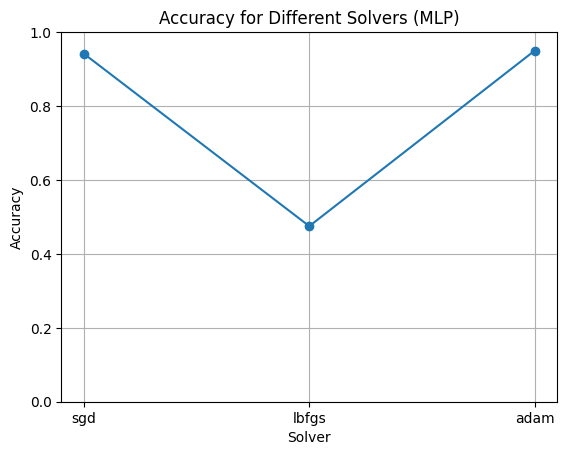

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

#### <strong><font color=cornflowerblue>第三部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用主成分PCA資料</font></strong> 

以下程式碼為將原始資料進行主成分分析，並試製 random_state 確保使用資料相同。

其中使用了前50個主成分，可以包含到原始資料中 88.27% 的資訊。

In [10]:
from sklearn.decomposition import PCA
random_state = 31
pca = PCA(n_components = 50).fit(X_train) #設定取幾個conponents
Z_train = pca.transform(X_train) 
Z_test = pca.transform(X_test)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio for each component
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {explained_variance:.4f}")

# Print cumulative explained variance ratio
for i, cumulative_variance in enumerate(cumulative_explained_variance_ratio):
    print(f"Cumulative Variance up to Principal Component {i+1} = {cumulative_variance:.4f}")

Principal Component 1: Explained Variance Ratio = 0.2456
Principal Component 2: Explained Variance Ratio = 0.1363
Principal Component 3: Explained Variance Ratio = 0.0758
Principal Component 4: Explained Variance Ratio = 0.0514
Principal Component 5: Explained Variance Ratio = 0.0354
Principal Component 6: Explained Variance Ratio = 0.0312
Principal Component 7: Explained Variance Ratio = 0.0240
Principal Component 8: Explained Variance Ratio = 0.0210
Principal Component 9: Explained Variance Ratio = 0.0205
Principal Component 10: Explained Variance Ratio = 0.0167
Principal Component 11: Explained Variance Ratio = 0.0154
Principal Component 12: Explained Variance Ratio = 0.0146
Principal Component 13: Explained Variance Ratio = 0.0129
Principal Component 14: Explained Variance Ratio = 0.0122
Principal Component 15: Explained Variance Ratio = 0.0112
Principal Component 16: Explained Variance Ratio = 0.0100
Principal Component 17: Explained Variance Ratio = 0.0096
Principal Component 18:

以下程式碼目的是對主成分資料中的訓練集資料使用 Logistic Regression 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)。

三種 solver 的測試結果準確率如下：
- 'lbfgs'       ->   acuracy = 0.975

- 'liblinear'   ->   acuracy = 0.95

- 'newton-cg'  ->   acuracy = 0.975

其中使用 'lbfgs' 與 'newton-cg' 的結果相同且為最高，準確率達到 97.5% 。

Solver: lbfgs
Accuracy: 97.50%

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Solver: newton-cg
Accuracy: 97.50%

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

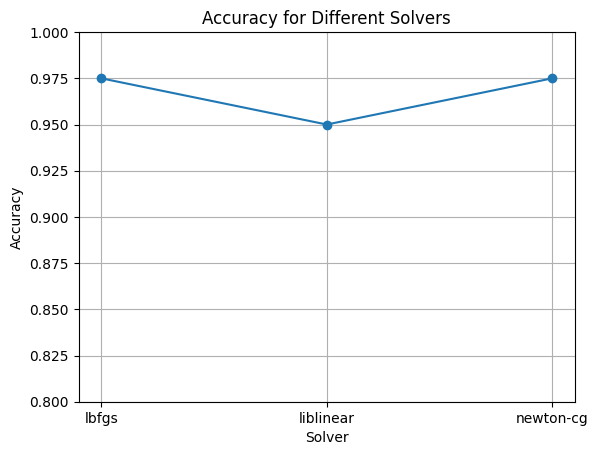

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR = LogisticRegression(solver=solver, **opts) 
    clf_LR.fit(Z_train, y_train)
    y_pred = clf_LR.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>Logistic RegressionCV；使用主成分PCA資料</font></strong>

以下程式碼目的是對主成分資料中的訓練集資料使用 Logistic RegressionCV 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)。

三種 solver 的測試結果準確率如下：
- 'lbfgs'       ->   acuracy = 0.975

- 'liblinear'   ->   acuracy = 0.875

- 'newton-cg'  ->   acuracy = 0.975

其中使用 'lbfgs' 與 'newton-cg' 的結果相同且為最高，準確率達到 97.5% 。

因為使用 Logistic RegressionCV 的好處是其會讓模型自動選擇C值，來確保獲得更佳的模型效能。但在此主成分資料中 Logistic RegressionCV 表現與 Logistic Regression 的表現相同，的最佳確率表現皆為 97.5%。

Solver: lbfgs
Accuracy: 97.50%

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Solver: liblinear
Accuracy: 87.50%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.40      0.57         5
          12       1.00      0.80      0.89         5
          13       0.08      1.00      0.14         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Solver: newton-cg
Accuracy: 97.50%

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

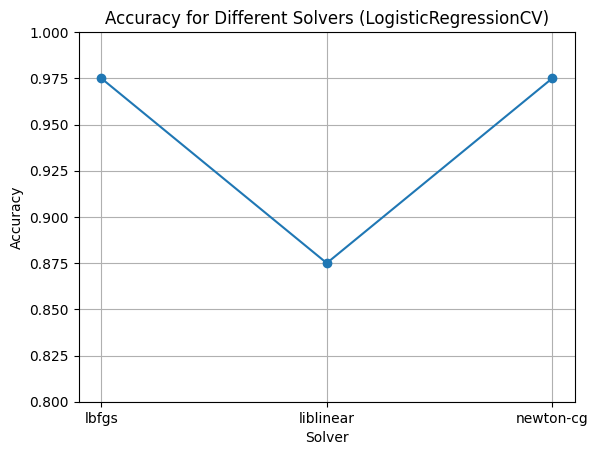

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)
Cs = np.logspace(-5, 5, 20)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR_CV = LogisticRegressionCV(Cs=Cs, solver=solver, **opts)
    clf_LR_CV.fit(Z_train, y_train)
    y_pred = clf_LR_CV.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (LogisticRegressionCV)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用主成分PCA資料</font></strong>

以下程式碼目的是對主成分資料中的訓練集資料使用 Support Vector Machine 訓練模型並測試準確率，其中使用三種不同的 kernal (核函數)與直接使用線性 SVM ，並以準確率畫出折線圖方便觀察。

其中使用核函數 'linear' 與直接使用線性 SVM 的結果較接近。且線性 SVM 的表現最好，準確率達到 94.17% 。

Kernel: linear
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       0.83      1.00      0.91         5
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         3
          17

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Kernel: linearSVM
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.60      0.75         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
         

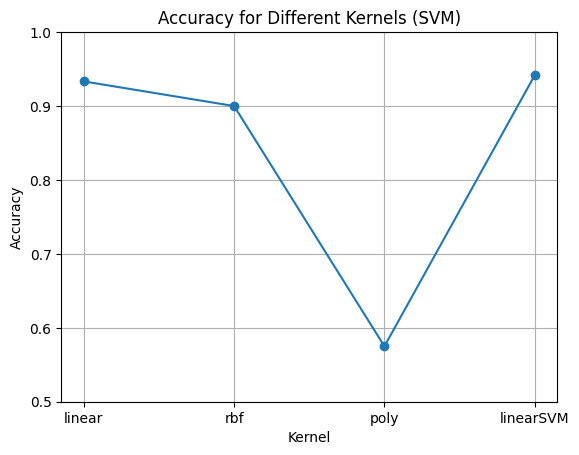

In [14]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly', 'linearSVM']
C = 1 # SVM regularization parameter
opts = dict(C=C, tol=1e-6, max_iter=int(1e6))
accuracies = []  # 用來收集準確率

for kernel in kernels:
    if kernel == 'linearSVM':
        clf_svm = LinearSVC(**opts)
    else:
        clf_svm = SVC(kernel=kernel, **opts)
    
    clf_svm.fit(Z_train, y_train)
    y_pred = clf_svm.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

# 繪製折線圖
plt.plot(kernels, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Kernels (SVM)')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用主成分PCA資料</font></strong>

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以準確率畫出折線圖方便觀察。

三種 solver 的測試結果準確率如下：
- 'sgd'  ->   acuracy = 0.925

- 'lbfgs'  ->   acuracy = 0.96

- 'adam'       ->   acuracy = 0.95

表現最好的為使用演算法 'lbfgs' 的 96%。

Solver: sgd
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         1
          14       0.83      1.00      0.91         5
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         3
          17   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         3
          17 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

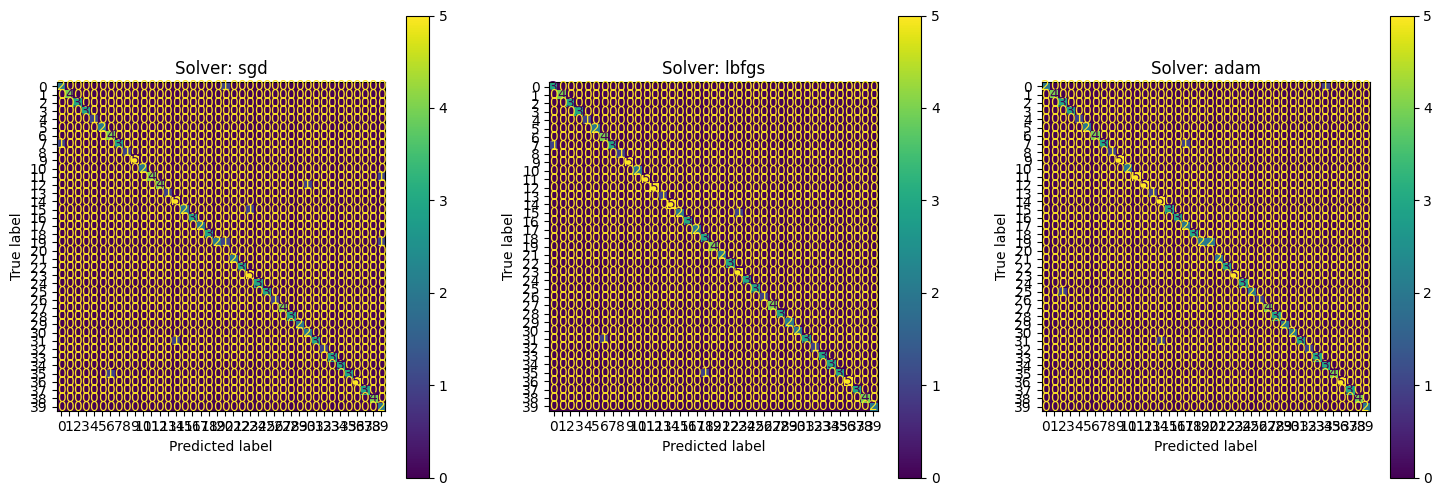

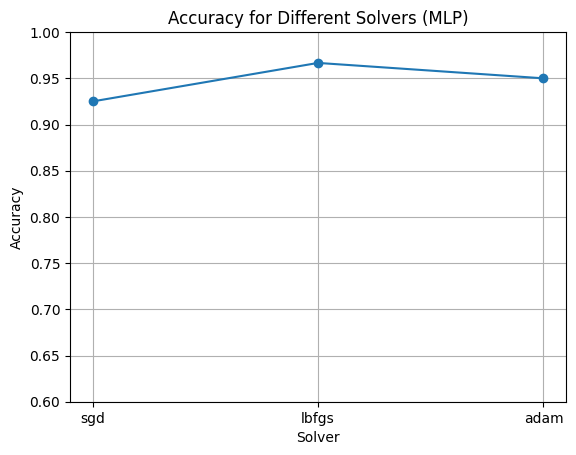

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

solvers = ['sgd', 'lbfgs', 'adam']
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes=hidden_layers, verbose=False, activation=activation, tol=1e-6, max_iter=int(1e6))

accuracies = []  # 用來收集準確率
confusion_matrices = []  # 用來收集混淆矩陣

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 創建 1x3 的子圖

for i, solver in enumerate(solvers):
    clf_MLP = MLPClassifier(solver=solver, **opts)
    clf_MLP.fit(Z_train, y_train)
    y_pred = clf_MLP.predict(Z_test)

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率

    print(f"Solver: {solver}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

    # 繪製混淆矩陣
    disp = ConfusionMatrixDisplay.from_estimator(clf_MLP, Z_test, y_test, ax=axes[i])
    disp.ax_.set_title(f'Solver: {solver}')
    confusion_matrices.append(disp.confusion_matrix)  # 收集混淆矩陣

# 繪製準確率折線圖
plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
plt.grid(True)
plt.show()

<hr>

#### <strong><font color=#29AB87>標準化資料分類結果： </font></strong> 

以下將列出將標準化之原始資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 96.67%

- Support Vector Machine : 95%

- Neural Network : 95%

準確率最高的分類器為 Logistic Regression 的 96.67% 。

<hr>

#### <strong><font color=#29AB87>主成分資料分類結果： </font></strong> 
主成分涵蓋原始資料之資訊量：
- 88.27%

以下將列出將主成分資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 97.5%

- Support Vector Machine : 94.47%

- Neural Network : 96%

準確率最高的分類器為 Logistic Regression 的 97.5% 。

<hr>

#### <strong><font color=#D2691E>資料分類結果觀察： </font></strong> 

在此 AT&T 的人臉資料中，觀察到不論是標準化之原始資料或是主成分資料，其分類準確率最好的皆為 Logistic Regression 的結果。
值得注意的是，在同樣為使用 Logistic Regression 以及 Neural Network 來訓練模型之下，主成分資料的準確率表現比原始資料之訓練表現來的好。
這可能是因為主成分分析可以幫助減少資料中的噪聲，將資料轉換為新的、更具代表性的特徵空間。
因此有助於模型更好地捕捉資料中的模式，從而提高了模型的效能。
